In [17]:
import numpy as np
import pandas as pd

from structures import *
from averager import *

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Ввод-вывод файла

В данном примере считывание производится из .csv-файла.

In [18]:
with open("myfile.csv") as file:
    data = StreamData(file.read(), 501, 981)

print(data.dataset)

             X     Y  Z  X Velocity  Y Velocity  Z Velocity  Unnamed: 6
0      -0.1250  0.00  0    0.000524    0.063100    0.000119         NaN
1      -0.1245  0.00  0    0.001133    0.159946    0.000207         NaN
2      -0.1240  0.00  0    0.002006    0.188397    0.000222         NaN
3      -0.1235  0.00  0    0.002408    0.191553    0.000225         NaN
4      -0.1230  0.00  0    0.002490    0.191796    0.000225         NaN
...        ...   ... ..         ...         ...         ...         ...
491476  0.1230  0.49  0   -0.004967   -0.238701    0.045147         NaN
491477  0.1235  0.49  0   -0.004193   -0.228045    0.043539         NaN
491478  0.1240  0.49  0   -0.002693   -0.196214    0.038637         NaN
491479  0.1245  0.49  0   -0.001164   -0.133619    0.022871         NaN
491480  0.1250  0.49  0   -0.000221   -0.043466    0.004108         NaN

[491481 rows x 7 columns]


# Осреднение

Создаем три временных списка, получая и преобразуя соотвествующие столбцы датасета

In [19]:
tmplistX = advance_to_column(data, "X Velocity")
tmplistY = advance_to_column(data, "Y Velocity")
tmplistZ = advance_to_column(data, "Z Velocity")

Функция возвращающая модуль трех введенных полей:

In [20]:
def calculate_module_of_arrays(our_fields: list) -> list:
    module_of_fields = [[float(0) for y in range(len(our_fields[0][0]))] for x in range(len(our_fields[0]))]
    for i in range(len(our_fields[0])):
        for j in range(len(our_fields[0][0])):
            module_of_fields[i][j] = (our_fields[0][i][j]**2 + our_fields[1][i][j]**2 + our_fields[2][i][j]**2)**0.5
    return module_of_fields

Функция для построения графиков в одну картинку, сколько введено столько и построит:

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def plot_figures_in_row(figures, titles=None, xlabels=None, ylabels=None, show_axes=True, show_colorbar=False, figsize=(6, 6), subplot_widths=None, font_size=12, nrows=1, normalize=None):
    # Determine the number of figures in the list
    num_figures = len(figures)
    # Determine the number of rows and columns of subplots
    ncols = num_figures // nrows
    if num_figures % nrows > 0:
        ncols += 1

    # Create a new figure with a specified size and subplot layout
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

    # Set font size for all elements in the figure
    plt.rcParams.update({'font.size': font_size})

    # Add each figure to a subplot
    for i in range(num_figures):
        row = i // ncols
        col = i % ncols
        if nrows == 1:
            ax = axs[col]
        else:
            ax = axs[row, col]
        if show_axes:
            if normalize is not None:
                im = ax.imshow(figures[i], cmap='Viridis', interpolation='bilinear', vmin=normalize[0], vmax=normalize[1])
            else:
                im = ax.imshow(figures[i], cmap='Viridis')
        else:
            if normalize is not None:
                im = ax.imshow(figures[i], cmap='Viridis', interpolation='bilinear', vmin=normalize[0], vmax=normalize[1])
                ax.set_axis_off()
            else:
                im = ax.imshow(figures[i], cmap='Viridis', interpolation='bilinear')
                ax.set_axis_off()
        if titles is not None:
            ax.set_title(titles[i])
        if xlabels is not None:
            ax.set_xlabel(xlabels[i])
        if ylabels is not None:
            ax.set_ylabel(ylabels[i])
        if show_colorbar:
            fig.colorbar(im, ax=ax)

    # Adjust the spacing between subplots and show the figure
    plt.subplots_adjust(wspace=0.1)
    plt.subplots_adjust(hspace=0.1)
    plt.show()
# Set the size of the figure
figsize = (24, 8)

# Remove the axes from the subplots
show_axes = False

# Add a color bar to the subplots
show_colorbar = True

# Set the width ratio of each subplot
subplot_widths = [4, 4, 4, 4]

# Set the font size for all text elements
font_size = 10

# Set normalization
normalize = [0, 1.5]

Делаем 100 итераций осреднения на `tmplistX` с радиусом 2

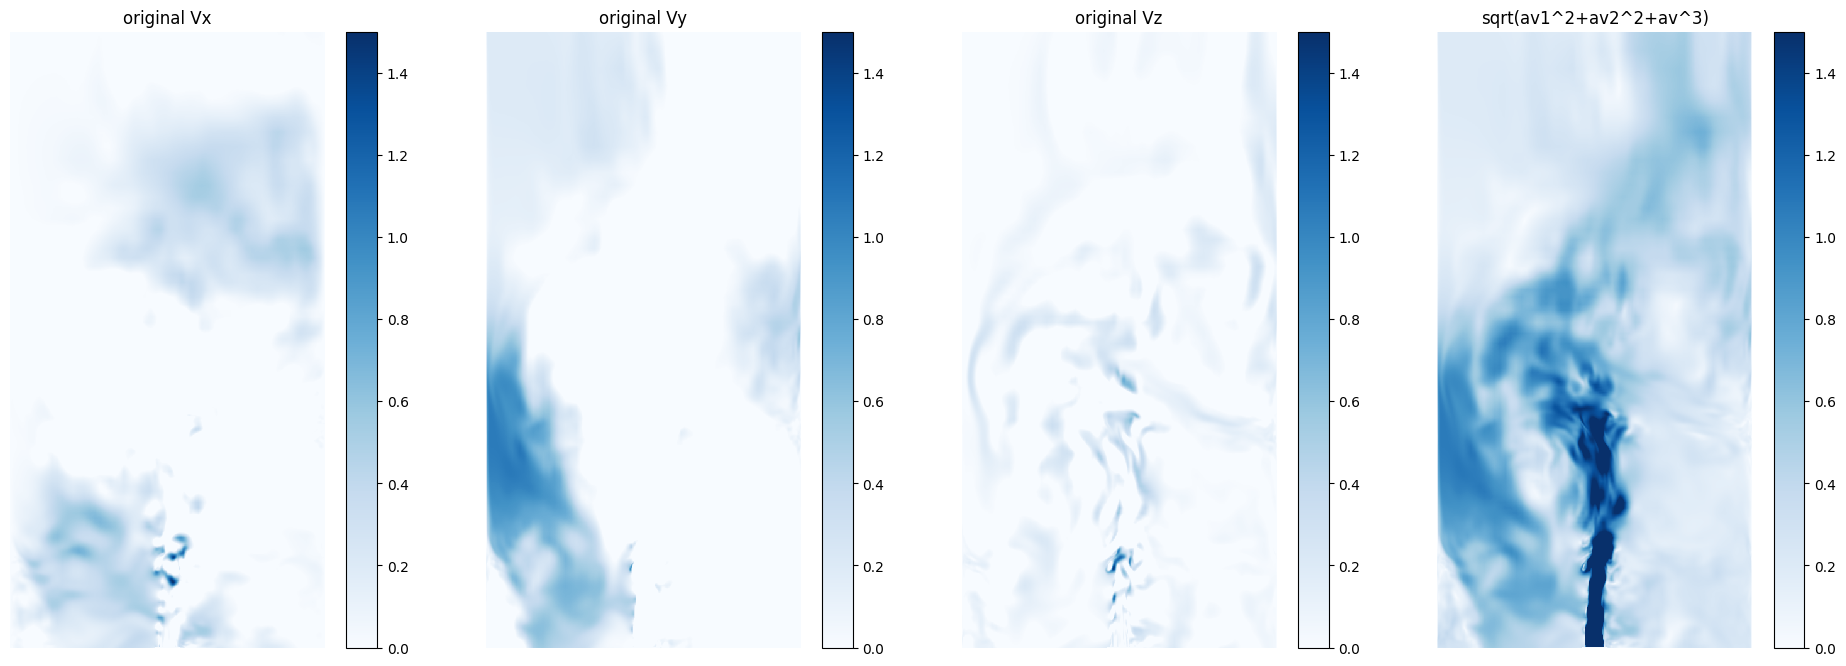

AttributeError: 'list' object has no attribute 'shape'

In [60]:
# Define radius of averaging
av_radius = 2

all_coord_mod = calculate_module_of_arrays((tmplistX, tmplistY, tmplistZ))

tmplistX = np.array(tmplistX)
tmplistY = np.array(tmplistY)
tmplistZ = np.array(tmplistZ)

graphics = []
graphics.append(tmplistX)
graphics.append(tmplistY)
graphics.append(tmplistZ)
graphics.append(all_coord_mod)

titles = ["original Vx", "original Vy", "original Vz", "sqrt(av1^2+av2^2+av^3)"]

plot_figures_in_row(graphics, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, normalize=normalize)

av1 = basic_2d_array_averaging(tmplistX, av_radius)
av2 = basic_2d_array_averaging(tmplistY, av_radius)
av3 = basic_2d_array_averaging(tmplistZ, av_radius)

for i in range(100):
    av1 = basic_2d_array_averaging(av1, av_radius)
    av2 = basic_2d_array_averaging(av2, av_radius)
    av3 = basic_2d_array_averaging(av3, av_radius)
all_coord_mod = calculate_module_of_arrays((av1, av2, av3))

titles = ["final averaged Vx", "final averaged Vy", "final averaged Vz", "final module of V's"]

print('поле при '+str(i+1)+"'й итерации")
graphics = []
graphics.append(av1)
graphics.append(av2)
graphics.append(av3)
graphics.append(all_coord_mod)

plot_figures_in_row(graphics, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, normalize=normalize)

for i in range(200):
    av1 = basic_2d_array_averaging(av1, av_radius)
    av2 = basic_2d_array_averaging(av2, av_radius)
    av3 = basic_2d_array_averaging(av3, av_radius)
all_coord_mod = calculate_module_of_arrays((av1, av2, av3))

print('поле при '+str(i+101)+"'й итерации")
graphics = []
graphics.append(av1)
graphics.append(av2)
graphics.append(av3)
graphics.append(all_coord_mod)

plot_figures_in_row(graphics, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, normalize=normalize)

for i in range(200):
    av1 = basic_2d_array_averaging(av1, av_radius)
    av2 = basic_2d_array_averaging(av2, av_radius)
    av3 = basic_2d_array_averaging(av3, av_radius)
all_coord_mod = calculate_module_of_arrays((av1, av2, av3))

print('поле при '+str(i+301)+"'й итерации")
graphics = []
graphics.append(av1)
graphics.append(av2)
graphics.append(av3)
graphics.append(all_coord_mod)

plot_figures_in_row(graphics, titles=titles, figsize=figsize, show_axes=show_axes, show_colorbar=show_colorbar, font_size=font_size, subplot_widths=subplot_widths, normalize=normalize)


Опять запускаем осреднение, только в этот раз сохраняем значения на каждой итерации.

In [ ]:
av_radius = 2

all_coord_mod = calculate_module_of_arrays((tmplistX, tmplistY, tmplistZ))

figure1 = []
figure2 = []
figure3 = []
figure4 = []
figure1.append(tmplistX)
figure2.append(tmplistY)
figure3.append(tmplistZ)
figure4.append(all_coord_mod)


av1 = basic_2d_array_averaging(tmplistX, av_radius)
av2 = basic_2d_array_averaging(tmplistY, av_radius)
av3 = basic_2d_array_averaging(tmplistZ, av_radius)
all_coord_mod = calculate_module_of_arrays((av1, av2, av3))

figure1.append(av1)
figure2.append(av2)
figure3.append(av3)
figure4.append(all_coord_mod)

for i in range(100):
    av1 = basic_2d_array_averaging(av1, av_radius)
    av2 = basic_2d_array_averaging(av2, av_radius)
    av3 = basic_2d_array_averaging(av3, av_radius)
    all_coord_mod = calculate_module_of_arrays((av1, av2, av3))
    figure1.append(av1)
    figure2.append(av2)
    figure3.append(av3)
    figure4.append(all_coord_mod)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation

def create_gif(data, filename, name='', duration=100):
    fig, ax = plt.subplots()
    animations = []
    i = 0
    try:
        for d in data:
            i += 1
            im = ax.imshow(d, cmap='viridis', interpolation='nearest')
            ax.set_title(name + str(i)) # add name to the title of the figure
            animations.append([im])
        ani = ArtistAnimation(fig, animations, interval=duration, blit=True)
        ani.save(filename, writer='imagemagick')
    except Exception as e:
        print(str(e))

MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter imagemagick unavailable; using Pillow instead.


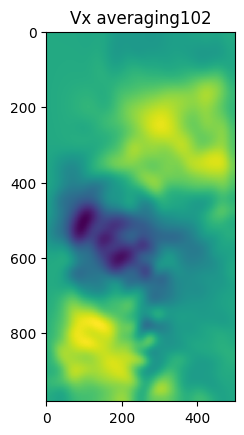

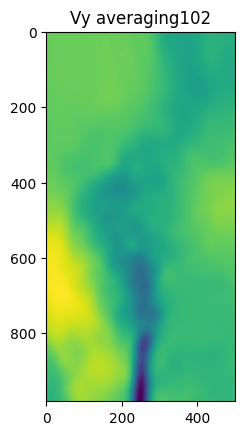

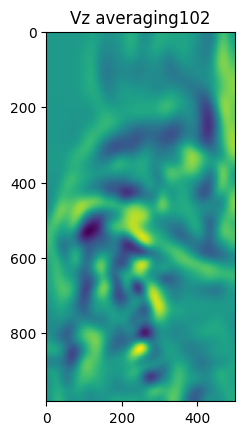

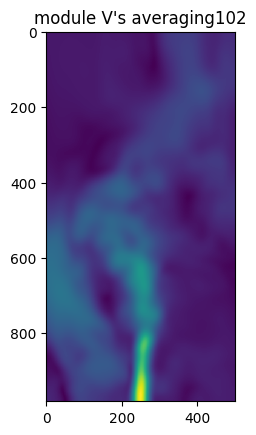

In [ ]:
create_gif(figure1, 'figure1.gif', name='Vx averaging', duration=40)
create_gif(figure2, 'figure2.gif', name='Vy averaging', duration=40)
create_gif(figure3, 'figure3.gif', name='Vz averaging', duration=40)
create_gif(figure4, 'figure4.gif', name="module V's averaging", duration=40)

Получилось как-то так